Trapezoidal rule area: 2.79742776


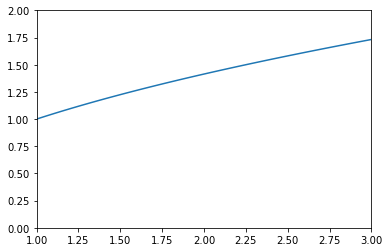

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Graficamos la función

def f(x):
    return np.sqrt(x);  # evaluamos fx

a, b = 1, 3
c = 2
x = np.linspace(a, b, 100)  # Rango para la variable x
fx = f(x)  # Evaluamos f(x)
plt.plot(x, fx)  # Graficamos x, fx
plt.xlim(a, b)
plt.ylim(0, c)

# Calculamos el área por integración númerica usando la regla del trapecio
# Usamos trapz(y, x) implementada en numpy
area = round(np.trapz(fx, x), 8)
print("Trapezoidal rule area:", area)

def riemann_sum(f, a, b, rn=10, method='mid', ax=None):
    
    if ax is None: fig, ax = plt.subplots()
    
    x = np.linspace(a, b, 100)  # Rango para la variable x
    fx = f(x)  # Evaluamos f(x)
    ax.plot(x, fx)  # Graficamos x, fx
    width = (b - a) / (rn)
    rectangles = np.linspace(a, b, rn+1)

    if method == 'mid':
        r = [ax.add_patch(Rectangle((xy[0], 0), width, xy[1], facecolor='none', edgecolor='black'))
             for xy in zip(rectangles[:-1], f((rectangles[:-1]+rectangles[1:])/2))]
        print("Mid point:", f((rectangles[:-1]+rectangles[1:])/2).sum()*width)
    if method == 'left':
        r = [ax.add_patch(Rectangle((xy[0], 0), width, xy[1], facecolor='none', edgecolor='black'))
             for xy in zip(rectangles[:-1], f(rectangles[:-1]))]
        print("Left sum:", f(rectangles[:-1]).sum()*width)
    if method == 'right':
        r = [ax.add_patch(Rectangle((xy[0], 0), width, xy[1], facecolor='none', edgecolor='black'))
             for xy in zip(rectangles[:-1], f(rectangles[1:]))]
        print("Right sum:", f(rectangles[1:]).sum()*width)

def monte_carlo(f, a, b, rn, method="mc_sampling", c=None, ax=None):
    
    if ax is None: fig, ax = plt.subplots()

    x = np.linspace(a, b, 100)  # Rango para la variable x
    fx = f(x)  # Evaluamos f(x)
    ax.plot(x, fx)  # Graficamos x, fx
    
    width = (b - a) / (rn)
    
    if method == 'mc_sampling':
        xi = np.random.random(size=rn)*(b-a)+a
        print("Monte Carlo Sampling:", (f(xi)*width).sum(), "Order of error:", 1/np.sqrt(rn))
        r = [ax.add_patch(Rectangle((xy[0], 0), width, xy[1], facecolor='none', edgecolor='black'))
             for xy in zip(xi, f(xi))]

    if method == "mc_hit_and_miss" and c is not None:
        darts = rn
        xi = np.random.random(size=darts)*(b-a)+a
        yi = np.random.random(size=darts)*c

        darts_inside = np.where(yi < f(xi))[0]
        area_rectangle = (b-a)*c
        area_hit_and_miss = len(darts_inside) / darts * area_rectangle
        print("Monte Carlo Hit and Miss:", area_hit_and_miss, "Order of error:", 1/np.sqrt(darts))
        plt.plot(xi[darts_inside], yi[darts_inside], '.')
        darts_outside = list( set(range(darts)) - set(darts_inside))
        plt.plot(xi[darts_outside], yi[darts_outside], '.')
        plt.xlim(a, b)
        plt.ylim(0, c)

Mid point: 2.797786480706403


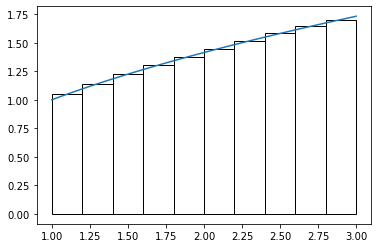

In [2]:
riemann_sum(f, 1, 3, method='mid')

Mid point: 2.797786480706403
Left sum: 2.7235262246401075
Right sum: 2.8699363861538827


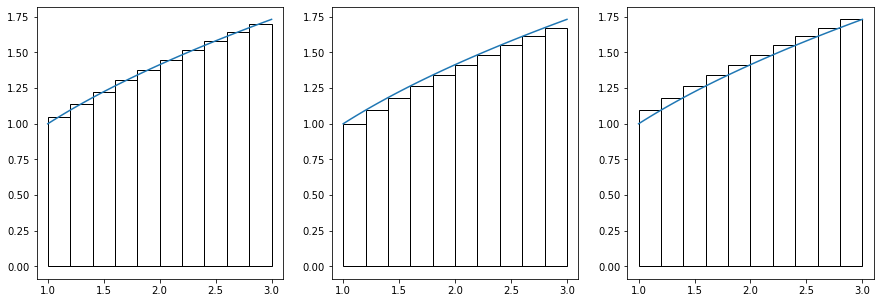

In [3]:
fig, ax = plt.subplots(1, 3, sharex=True, figsize=(15,5))
method = ['mid', 'left', 'right']
rs = [riemann_sum(f, 1, 3, method=m, ax=ax[i]) for i, m in enumerate(method)]

Monte Carlo Sampling: 2.810347564051822 Order of error: 0.1
Monte Carlo Hit and Miss: 2.76 Order of error: 0.03162277660168379


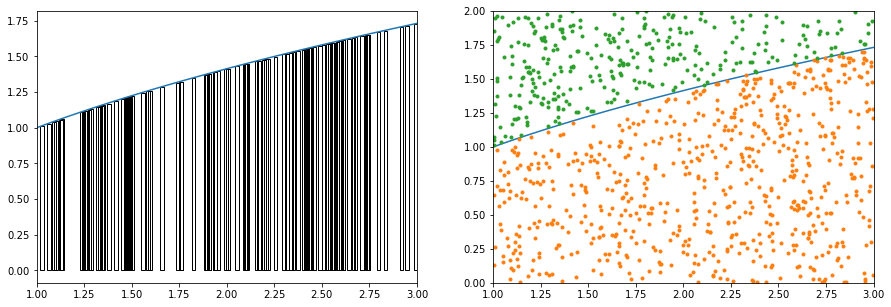

In [4]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
monte_carlo(f, a, b, 100, ax=ax[0])
monte_carlo(f, a, b, 1000, 'mc_hit_and_miss', 2, ax[1])